# Работа с текстами

###### библиотека NLTK - питоновская библиотека для манипуляцй с текстами

In [1]:
import nltk

##### токенизация: разбитие текста на токены
Первый этап работы с текстовой информацией - выделение слов. 

In [2]:
tokenizer = nltk.tokenize.WordPunctTokenizer()

print("WordPuckt tokenizer")
print(tokenizer.tokenize('Мама мыла раму'))
print(tokenizer.tokenize('Ростов-на-Дону'))


tokenizer = nltk.tokenize.TreebankWordTokenizer()
print("\nTreebankWord tokenizer")
print(tokenizer.tokenize('Мама мыла раму'))
print(tokenizer.tokenize('Ростов-на-Дону'))

WordPuckt tokenizer
['Мама', 'мыла', 'раму']
['Ростов', '-', 'на', '-', 'Дону']

TreebankWord tokenizer
['Мама', 'мыла', 'раму']
['Ростов-на-Дону']


##### Стемминг - приведение слов к нормальному виду


In [3]:
from nltk.stem.snowball import RussianStemmer
stemmer = RussianStemmer()
tokens = tokenizer.tokenize('Карл у Клары украл кораллы, Клара у Карла уркала кларнет.')
tokens_stem = [stemmer.stem(token.lower()) for token in tokens]
print(tokens_stem)

['карл', 'у', 'клар', 'укра', 'коралл', ',', 'клар', 'у', 'карл', 'урка', 'кларнет', '.']


#### Мешок слов
Простейшая модель для работы с текстами - 'мешок слов'. Идея заключается в том, что смысл текста можно восстановить даже не зная порядок слов, только зная их количества

In [4]:
from collections import Counter
tokens_bow = Counter(tokens_stem)
print(dict(tokens_bow))

{'урка': 1, 'клар': 2, 'укра': 1, 'карл': 2, 'кларнет': 1, ',': 1, 'коралл': 1, '.': 1, 'у': 2}


#### Корпусом в текстовом анализе называают набор документов

In [5]:
import gensim
corpora = [
    "Белый заяц бел, да цена ему пятнадцать копеек.",
    "В кулаке все пальцы равны.",
    "Глазам стыдно, а душа радуется.",
    "Где дешево, там и дорого.",
    "Дойдут и до глухого вести.",
    "И бородавка телу прибавка.",
    "Купить лишнее - продать нужное.",
    "Одним махом сто побивахом, а прочих не считахом.",
    "Смерть найдет причину.",
    "У нашего Гришки нет отрыжки."
]

corpora_tokenzied = [tokenizer.tokenize(doc.lower()) for doc in corpora]
corpora_stemmed = []

for doc in corpora_tokenzied:
    stemmed_doc = [stemmer.stem(token) for token in doc]
    corpora_stemmed.append(stemmed_doc)

for doc in corpora_stemmed:
    print(doc)

['бел', 'заяц', 'бел', ',', 'да', 'цен', 'ем', 'пятнадца', 'копеек', '.']
['в', 'кулак', 'все', 'пальц', 'равн', '.']
['глаз', 'стыдн', ',', 'а', 'душ', 'рад', '.']
['где', 'дешев', ',', 'там', 'и', 'дор', '.']
['дойдут', 'и', 'до', 'глух', 'вест', '.']
['и', 'бородавк', 'тел', 'прибавк', '.']
['куп', 'лишн', '-', 'прода', 'нужн', '.']
['одн', 'мах', 'сто', 'побивах', ',', 'а', 'проч', 'не', 'считах', '.']
['смерт', 'найдет', 'причин', '.']
['у', 'наш', 'гришк', 'нет', 'отрыжк', '.']


/anaconda3/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


#### библиотека gensim содержит некоторое количество математических моделей для работы с текстами

In [6]:
import gensim

При работе с текстами не очень удобно использазовать строковые id, удобнее все слова языка пронумеровать и заменить их числами. В gensim для этого есть специальный класс Dictionary.

In [7]:
dictionary = gensim.corpora.Dictionary(corpora_stemmed)
print(dictionary.token2id['в'])

10


Теперь соберем преобразуем наш корпус в мешки слов. Для этого воспользуемся стандартным функционалом gensim

In [8]:
corpora_bow = [dictionary.doc2bow(doc) for doc in corpora_stemmed]
corpora_bow

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1)],
 [(6, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)],
 [(6, 1), (8, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)],
 [(6, 1), (8, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)],
 [(6, 1), (21, 1), (24, 1), (25, 1), (26, 1), (27, 1)],
 [(6, 1), (21, 1), (28, 1), (29, 1), (30, 1)],
 [(6, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1)],
 [(6, 1),
  (8, 1),
  (17, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1)],
 [(6, 1), (43, 1), (44, 1), (45, 1)],
 [(6, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)]]

Теперь можно уже воспринимать документы не как тексты, а как вектор в N-мерном пространстве, в котором i-я координата означает количество раз, которое i-е слово встретилось в документе. 

#### частотный анализ. Посчитаем сколько раз каждое из слов встретилось в нашем корпусе


In [9]:
result = Counter()
for doc in corpora_bow:
    result += Counter(dict(doc))

for token_id, cnt in result.most_common(5):
    print(dictionary[token_id], cnt)

. 10
, 4
и 3
бел 2
а 2


##### считаем примеры текстов с которыми будем работать - база русскоязычных твитов

In [10]:
import json
twits = [json.loads(line) for line in open('twits.json')]
corpora = [twit['text'] for twit in twits]

### Задача №1. Посчитать частоты токенов в нашей базе. найти 20 самых частых. Для анализа использовать первых 5000 твитов
В процессе построить мешки слов и словарь при помощи gensim по первым 10000 

In [11]:
import pickle
(dictionary, corpora_bow) = pickle.load(open('twits_bow.pickle', 'rb'))

# закон ципфа
Закон Ципфа («ранг—частота») — эмпирическая закономерность распределения частоты слов естественного языка: если все слова языка (или просто достаточно длинного текста) упорядочить по убыванию частоты их использования, то частота n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру n (так называемому рангу этого слова, см. шкала порядка).

In [12]:
from tqdm import tqdm
token_freq = Counter()
for doc in tqdm(corpora_bow):
    for(token,cnt) in doc:
        token_freq[token] += cnt



100%|██████████| 226834/226834 [00:02<00:00, 85834.86it/s]


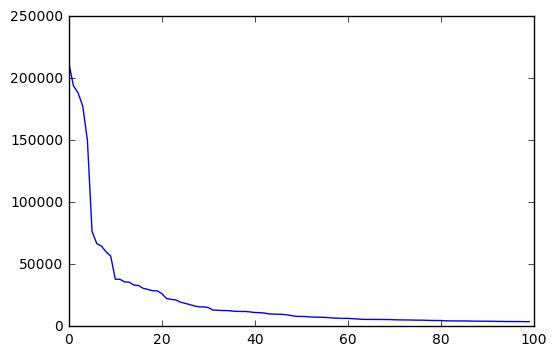

In [13]:
import math
from matplotlib import pyplot as plt

token_freq_list = token_freq.most_common(100)
rank = list(range(len(token_freq_list)))
freq = []
for i in rank:
    freq.append(token_freq_list[i][1])
    
plt.plot(rank, freq)
plt.show()

Самые частые слова являются наименее информативными. Хочется придумать какую-то модель, которая будет давать больший вес более редким словам и меньший вес более частым. 

# tf-idf

В модели tf-idf вместо просто количества слова используем количество домноженное на коэффицент idf, который уменьшает вес частых слов

![tf](https://wikimedia.org/api/rest_v1/media/math/render/svg/92a19022b85d3796b7e6237ea6829cb550ef17ff)
![idf](https://wikimedia.org/api/rest_v1/media/math/render/svg/1c1f3347300bd19654bedfaef73861cf75ac5e65)

doc[word] = tf[doc][word] * idf[word]


в gensim есть специальный модуль для работы с tfidf

In [14]:
tfidf = gensim.models.TfidfModel(corpora_bow)
corpora_tfidf = tfidf[corpora_bow]
list(corpora_tfidf[:10])

[[(0, 0.4809026955942146),
  (1, 0.1549904463520553),
  (2, 0.0928497710225409),
  (3, 0.05387287818990413),
  (4, 0.02691455151845914),
  (5, 0.05694296285347024),
  (6, 0.21336144715571811),
  (7, 0.2613056562290683),
  (8, 0.1365261262821155),
  (9, 0.11739324533170863),
  (10, 0.3586296798665273),
  (11, 0.022750476143302615),
  (12, 0.03383443400792644),
  (13, 0.10507218953206536),
  (14, 0.2844796304054208),
  (15, 0.2760828913633363),
  (16, 0.10461194513338669),
  (17, 0.12415370943374056),
  (18, 0.04893813111363555),
  (19, 0.4809026955942146),
  (20, 0.15654920366278924)],
 [(11, 0.033510687148961264),
  (13, 0.1547678057059894),
  (16, 0.15408988116678263),
  (18, 0.03604211162601677),
  (21, 0.18255729656546324),
  (22, 0.3526617324860378),
  (23, 0.3189773942397312),
  (24, 0.29094404024668824),
  (25, 0.13925247646107314),
  (26, 0.2402371254502715),
  (27, 0.10800724736436605),
  (28, 0.16903184031029542),
  (29, 0.34345593709987315),
  (30, 0.49646280177728175),
  (31

## sentiment analysis

Теперь у нас есть хорошее представление наших твитов. Попробуем обучить логистическую регрессию, которая научится отличать негативные твиты от позитивных

In [15]:
target = [twit['sentiment'] for twit in twits]

In [17]:
from scipy.sparse import csc_matrix
try:
    (data, col, row) = pickle.load(open('matrix.pickle', 'rb'))
except:
    data = []
    col = []
    row = []
    for i in tqdm(range(len(corpora_tfidf))):
        for j in range(len(corpora_tfidf[i])):
            data.append(corpora_tfidf[i][j][1])
            col.append(corpora_tfidf[i][j][0])
            row.append(i)
    pickle.dump((data, col, row), open('matrix.pickle', 'wb'))

In [18]:
matrix = csc_matrix((data, (row, col)), shape=(len(corpora_tfidf), len(dictionary)))
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

In [ ]:
classifier = LogisticRegression()
classifier.fit(matrix, target)


In [ ]:
coef_weight = list(enumerate(classifier.coef_[0]))
coef_weight.sort(key=lambda x: -x[1])
for word in coef_weight[:50]:
    print(dictionary[word[0]])

In [ ]:
def classify(text):
    tokens = [stemmer.stem(token) for token in tokenizer.tokenize(text.lower())]
    bow = dictionary.doc2bow(tokens)
    tfidf_vec = tfidf[bow]
    data = []
    col = []
    row = []
    for token in tfidf_vec:
        data.append(token[1])
        col.append(token[0])
        row.append(0)
    matrix_1 = csc_matrix((data, (row, col)), shape=(1, len(dictionary)))
    return(classifier.predict_proba(matrix_1)[0][1])

In [ ]:
print(classify("обнимашки, всех люблю"))

In [ ]:
print(classify("хочу умереть, ненавижу всех"))

# Problem 2
Разбить выборку на train и test и померить качество

азбить выборку на train и test и померить качество
Воспользоваться методами sklearn.cross_validation.train_test_split для разбивки и roc_auc_score для измерения качества

# topic modeling

Попробуем выяснить какие темы волнуют пользователей твиттера. Для этого воспользуемся моделью latent dirichlet allocation

In [ ]:
try:
    lda = pickle.load(open("lda_model.pickle", 'rb'))
except:
    lda = gensim.models.ldamulticore.LdaMulticore(corpus=corpora_tfidf, id2word=dictionary)
    pickle.dump(lda, open("lda_model.pickle", 'wb'))

for topic in lda.print_topics(5):
    print(topic)